## Libraries

In [2]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot  as plt
import seaborn as sns
sns.set()

from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

## Import Data

24 Sep 18 (SWaT.A2_Dec 2015)
Two sets of “SWaT_Dataset_Normal” – versions 0 and 1 – are provided. The datasets capture the normal state of the SWaT testbed running for seven days. In Version 0, we started recording the data when the plant was emptying the water storage tank for 30 minutes. In general, in an ICS environment, this is part of the maintenance outside normal operations. As a result of this drainage, the first 30 minutes of LIT101 data exhibits change even though there was no water in/outflow. Version 1 is derived from version 0 by removing the first 30 minutes of data.

In [3]:
SWaT_attack = 'SWaT_Dataset_Attack_v0.xlsx'
SWaT_normal_v0 = 'SWaT_Dataset_Normal_v0.xlsx'
SWaT_normal_v1 = 'SWaT_Dataset_Normal_v1.xlsx'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Thesis/SWaT.A1 & A2_Dec 2015/Physical/'+SWaT_normal_v1, header=1, nrows=6000)

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [6]:
# df.iloc[:,:12]
df

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:30:00 PM,0.000000,124.3135,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
1,22/12/2015 4:30:01 PM,0.000000,124.3920,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
2,22/12/2015 4:30:02 PM,0.000000,124.4705,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
3,22/12/2015 4:30:03 PM,0.000000,124.6668,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
4,22/12/2015 4:30:04 PM,0.000000,124.5098,1,1,1,251.9226,8.313446,312.7916,0.000000,...,1,1,9.100231,0.000000,3.3485,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,22/12/2015 6:09:55 PM,2.643564,314.0613,2,2,1,263.4901,8.352218,465.0346,2.473585,...,2,1,253.060100,1.649953,192.2584,0.000128,1,1,1,Normal
5996,22/12/2015 6:09:56 PM,2.662781,313.9828,2,2,1,263.4901,8.352218,465.0346,2.476404,...,2,1,253.268400,1.649953,192.4026,0.000128,1,1,1,Normal
5997,22/12/2015 6:09:57 PM,2.663741,313.7473,2,2,1,263.4901,8.352218,465.0346,2.476789,...,2,1,253.268400,1.537821,192.4026,0.000128,1,1,1,Normal
5998,22/12/2015 6:09:58 PM,2.638760,314.0221,2,2,1,263.4901,8.352218,465.0346,2.476789,...,2,1,253.268400,1.537821,192.4987,0.000128,1,1,1,Normal


### remove spaces from columns name

In [7]:
df = df.rename(columns=lambda x: x.strip())

### make copy

In [8]:
df_or = df.copy()

In [9]:
# df = df_or.copy()

# EDA

In [10]:
# Split data from labels
x_n, y_n = df.iloc[:, :-1], df.iloc[:, [-1]]

In [11]:
# remove date column
x_n.drop('Timestamp', axis=1, inplace=True)

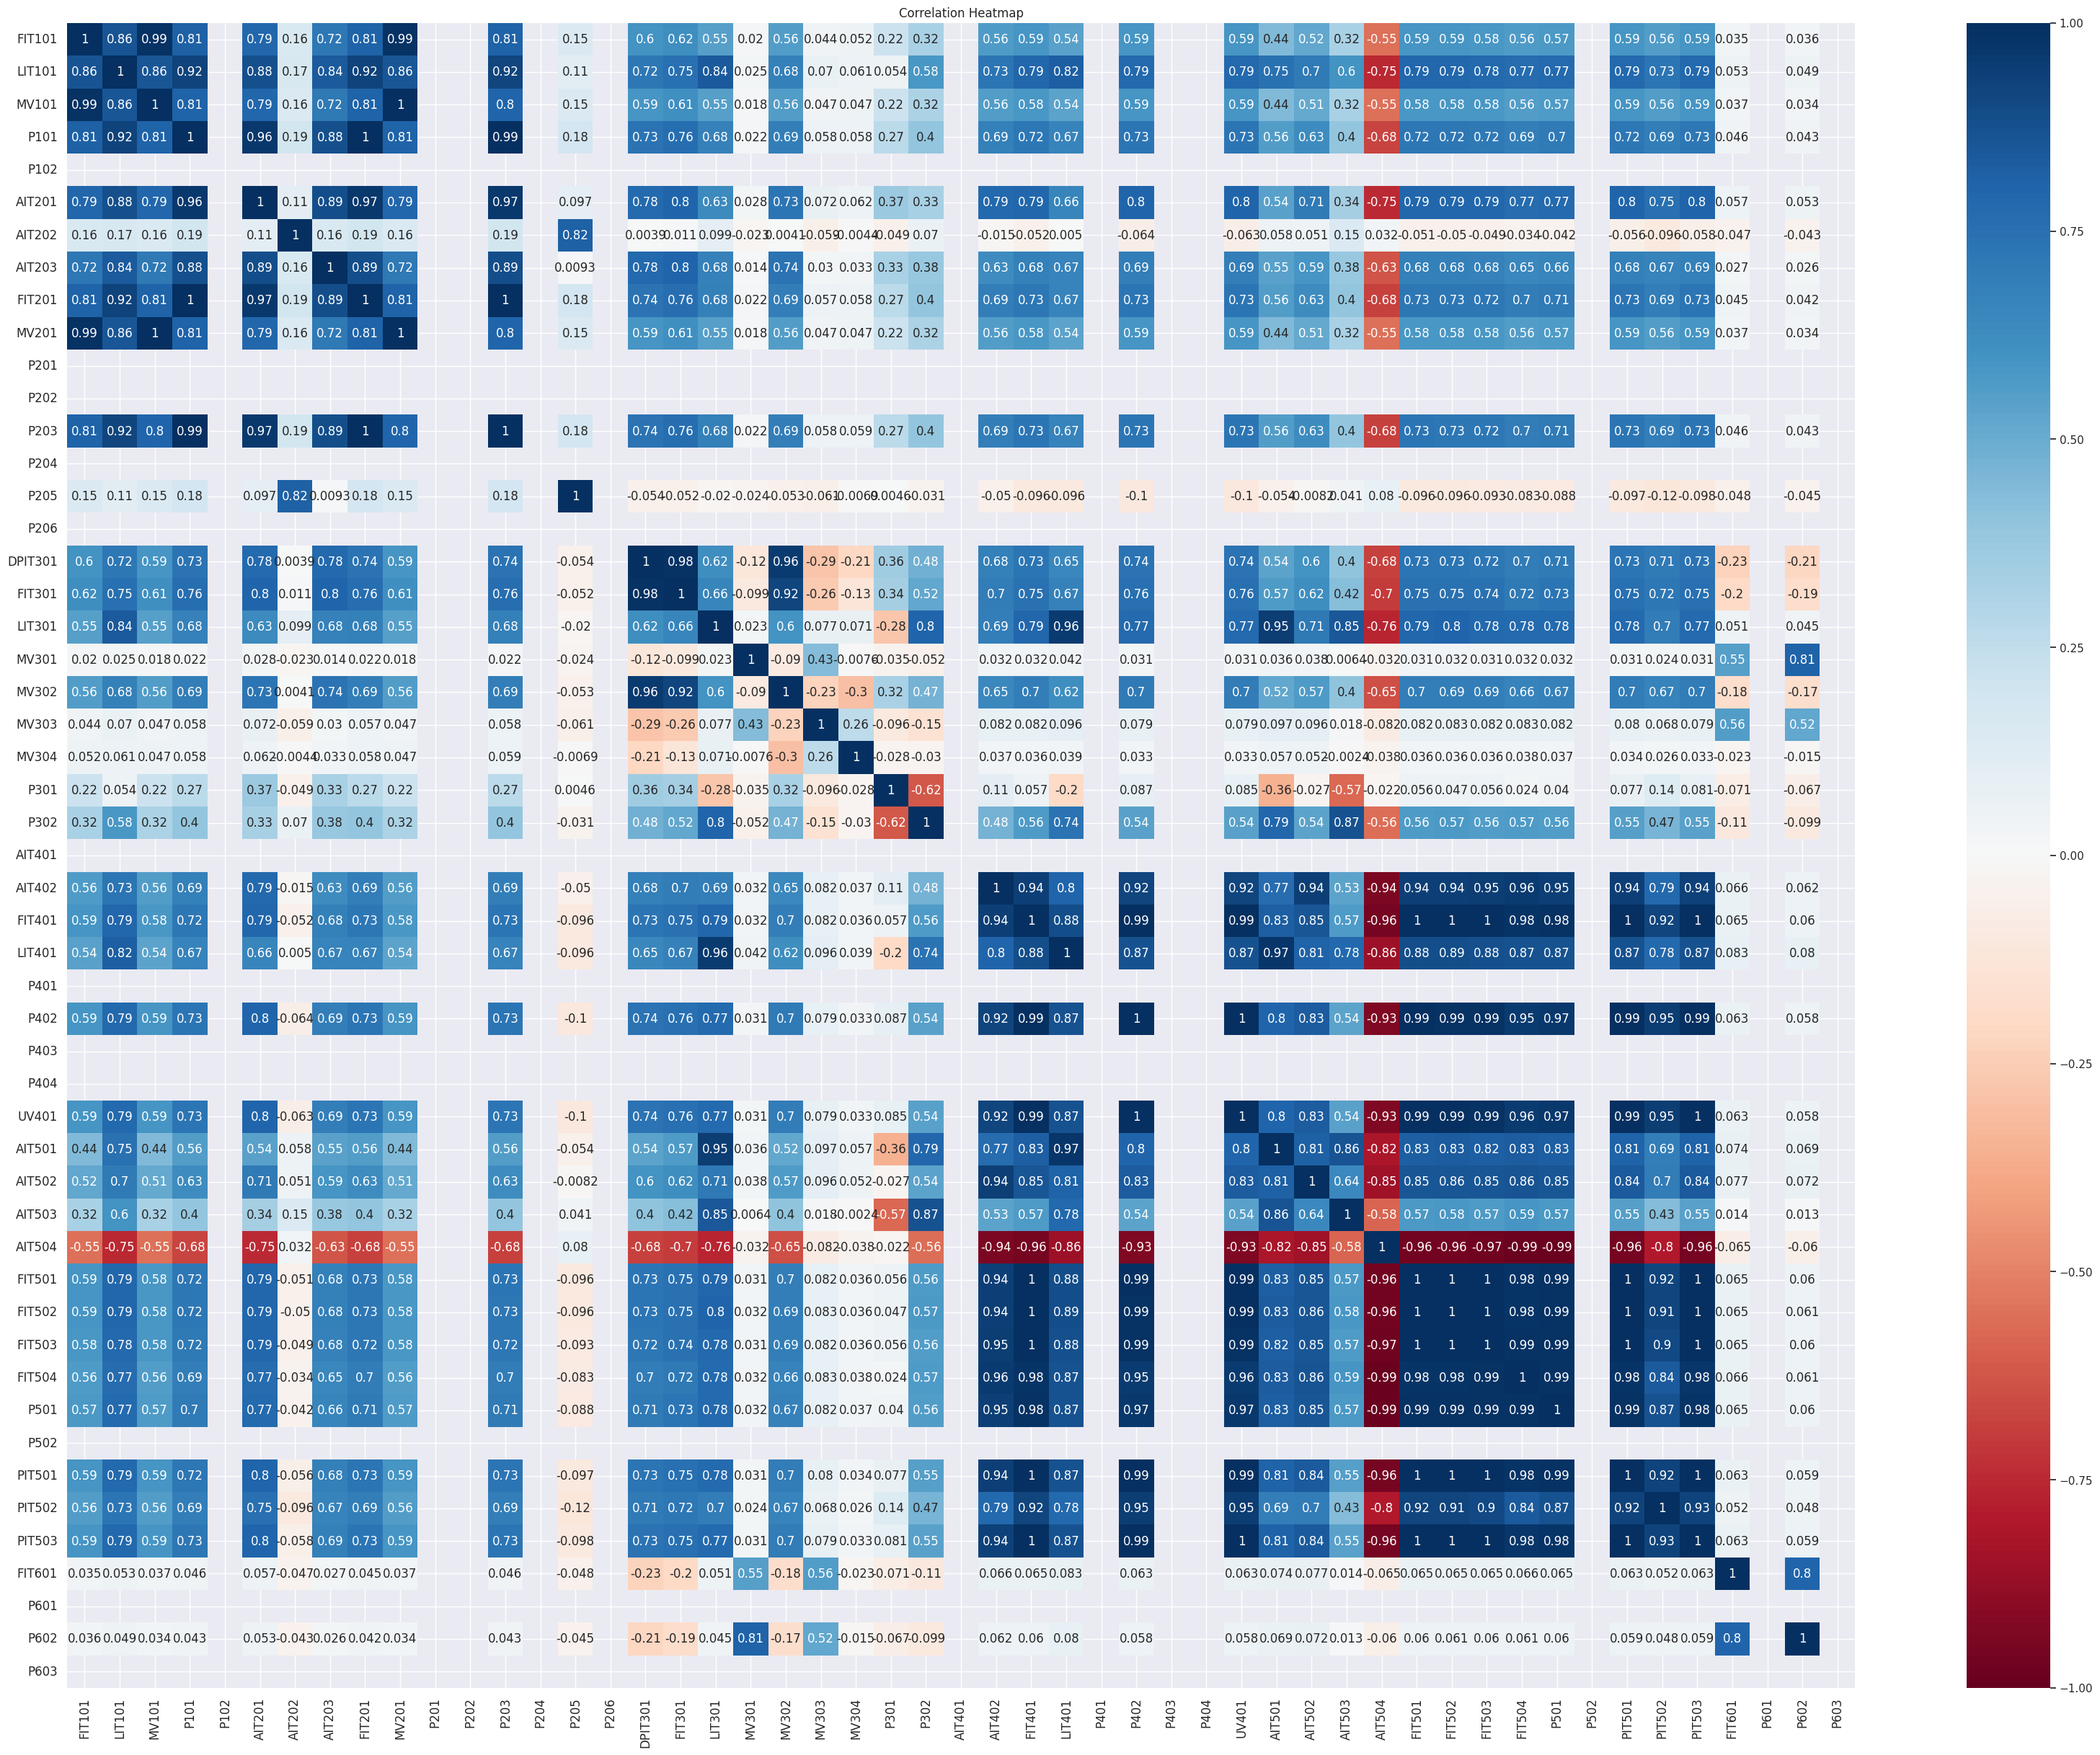

In [12]:
# Create correlation matrix
corr_mat = x_n.corr(method='pearson')

# Print the graph
plt.figure(figsize = (40, 30))
s = sns.heatmap(df.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## Analysing the reason behind NaN values in correlation:
checking : Types, Nulls and Unique values 

In [13]:
x_n.dtypes

FIT101     float64
LIT101     float64
MV101        int64
P101         int64
P102         int64
AIT201     float64
AIT202     float64
AIT203     float64
FIT201     float64
MV201        int64
P201         int64
P202         int64
P203         int64
P204         int64
P205         int64
P206         int64
DPIT301    float64
FIT301     float64
LIT301     float64
MV301        int64
MV302        int64
MV303        int64
MV304        int64
P301         int64
P302         int64
AIT401       int64
AIT402     float64
FIT401     float64
LIT401     float64
P401         int64
P402         int64
P403         int64
P404         int64
UV401        int64
AIT501     float64
AIT502     float64
AIT503     float64
AIT504     float64
FIT501     float64
FIT502     float64
FIT503     float64
FIT504     float64
P501         int64
P502         int64
PIT501     float64
PIT502     float64
PIT503     float64
FIT601     float64
P601         int64
P602         int64
P603         int64
dtype: object

In [14]:
nan_count = x_n.isna().sum()
print(nan_count )

FIT101     0
LIT101     0
MV101      0
P101       0
P102       0
AIT201     0
AIT202     0
AIT203     0
FIT201     0
MV201      0
P201       0
P202       0
P203       0
P204       0
P205       0
P206       0
DPIT301    0
FIT301     0
LIT301     0
MV301      0
MV302      0
MV303      0
MV304      0
P301       0
P302       0
AIT401     0
AIT402     0
FIT401     0
LIT401     0
P401       0
P402       0
P403       0
P404       0
UV401      0
AIT501     0
AIT502     0
AIT503     0
AIT504     0
FIT501     0
FIT502     0
FIT503     0
FIT504     0
P501       0
P502       0
PIT501     0
PIT502     0
PIT503     0
FIT601     0
P601       0
P602       0
P603       0
dtype: int64


In [15]:
uniqueValues = x_n.nunique()
df_unique = pd.DataFrame({'Column':uniqueValues.index, 'Unique':uniqueValues.values})
df_unique

,Column,Unique
0,FIT101,664
1,LIT101,1571
2,MV101,3
3,P101,2
4,P102,1
5,AIT201,131
6,AIT202,607
7,AIT203,1961
8,FIT201,138
9,MV201,3


### The NaN values are coming from columns having a single value which can be removed as it adds no information 
P202
p301
p401
p404
p502
p601
p603

Dropping unique single valued columns


In [16]:
# drop_col_single_value = ['P202', 'P301', 'P401', 'P404', 'P502', 'P601', 'P603']

In [17]:
# df.drop(drop_col_single_value, axis=1, inplace=True)

In [18]:
# df.columns

In [19]:
# # Retain upper triangular values of correlation matrix and
# # make Lower triangular values Null
# upper_corr_mat = corr_mat.where(
#     np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
# # Convert to 1-D series and drop Null values
# unique_corr_pairs = upper_corr_mat.unstack().dropna()

# #change to absolute value
# abs_unique_corr_pairs = unique_corr_pairs.abs()

# # Sort correlation pairs
# sorted_mat = abs_unique_corr_pairs.sort_values(ascending=False)
# print(sorted_mat)

Print top 10 values

In [20]:
# sorted_mat.to_csv('file_name.csv')

In [21]:
# print(sorted_mat[:15])

# Pre-processing

### one-hot encoding

In [22]:
df_categorical_fields = ['MV101', 'P101', 'P102', 'MV201', 'P201', 'P202', 'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'P401', 'P402', 'P403', 'P404', 'UV401', 'P501', 'P502', 'P601', 'P602', 'P603']
df_numerical_fields = ['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601']

In [23]:
# from sklearn.preprocessing import OneHotEncoder

# #creating instance of one-hot-encoder
# encoder = OneHotEncoder(handle_unknown='ignore')

# # One-hot-encode the categorical columns.
# enc_package_type = pd.DataFrame(encoder.fit_transform(x_n[df_categorical_fields]).toarray())

# #merge one-hot encoded columns back with original DataFrame
# x_n = x_n.join(enc_package_type)

# # data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)


# #view final df
# x_n

In [24]:
x_n.drop(df_categorical_fields, axis=1, inplace=True)

In [25]:
x_n.columns = x_n.columns.astype(str)

In [26]:
x_n.columns

Index(['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301',
       'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'PIT501', 'PIT502', 'PIT503', 'FIT601'],
      dtype='object')

# Widows size detection:
## **Autoencoder LSTM**

In [ ]:
# Split data from labels
x_n, y_n = df.iloc[:, :-1], df.iloc[:, [-1]]

In [ ]:
# remove date column
x_n.drop('Timestamp', axis=1, inplace=True)

In [ ]:
# remove label column
x_n.drop('Normal/Attack', axis=1, inplace=True)

In [ ]:
x_n.columns

Index(['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301',
       'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'PIT501', 'PIT502', 'PIT503', 'FIT601', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45'],
      dtype='object')

In [ ]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
x_n_scaled = scaler.fit_transform(x_n)
# test_scaled = scaler.transform(x_at)

In [ ]:
# Split only x_n_scaled into training and testing sets
X_train, X_test = train_test_split(x_n_scaled, test_size=0.2, random_state=42)

In [ ]:
X_train.shape[1]

71

### Trying different window sizes 

In [ ]:
window_size_list = [2, 4, 8, 16]

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 2, 71)             5112      
                                                                 
 dense_73 (Dense)            (None, 2, 16)             1152      
                                                                 
 dense_74 (Dense)            (None, 2, 8)              136       
                                                                 
 dense_75 (Dense)            (None, 2, 4)              36        
                                                                 
 dense_76 (Dense)            (None, 2, 2)              10        
                                                                 
 dense_77 (Dense)            (None, 2, 4)              12        
                                                                 
 dense_78 (Dense)            (None, 2, 8)             

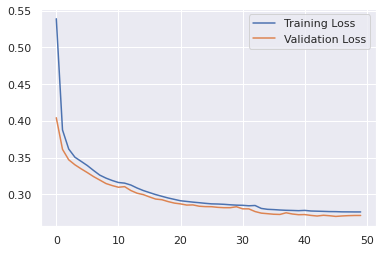

938/938 [==============================] - 4s 4ms/step
Mean Squared Error: 0.2824707125186427

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 4, 71)             5112      
                                                                 
 dense_82 (Dense)            (None, 4, 16)             1152      
                                                                 
 dense_83 (Dense)            (None, 4, 8)              136       
                                                                 
 dense_84 (Dense)            (None, 4, 4)              36        
                                                                 
 dense_85 (Dense)            (None, 4, 2)              10        
                                                                 
 dense_86 (Dense)            (None, 4, 4)              12        
                         

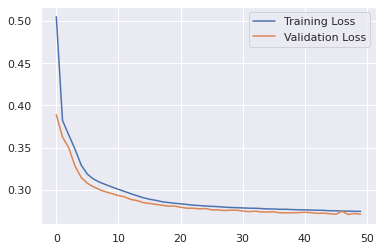

938/938 [==============================] - 6s 6ms/step
Mean Squared Error: 0.2810986014720546

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 8, 71)             5112      
                                                                 
 dense_91 (Dense)            (None, 8, 16)             1152      
                                                                 
 dense_92 (Dense)            (None, 8, 8)              136       
                                                                 
 dense_93 (Dense)            (None, 8, 4)              36        
                                                                 
 dense_94 (Dense)            (None, 8, 2)              10        
                                                                 
 dense_95 (Dense)            (None, 8, 4)              12        
                        

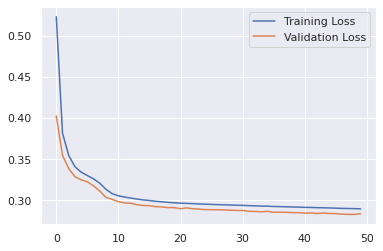

938/938 [==============================] - 5s 5ms/step
Mean Squared Error: 0.29873750545788536

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 16, 71)            5112      
                                                                 
 dense_100 (Dense)           (None, 16, 16)            1152      
                                                                 
 dense_101 (Dense)           (None, 16, 8)             136       
                                                                 
 dense_102 (Dense)           (None, 16, 4)             36        
                                                                 
 dense_103 (Dense)           (None, 16, 2)             10        
                                                                 
 dense_104 (Dense)           (None, 16, 4)             12        
                       

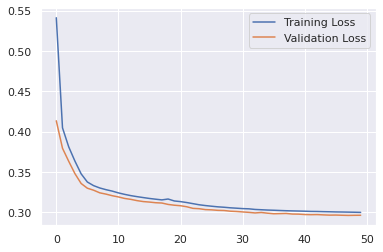

938/938 [==============================] - 7s 7ms/step
Mean Squared Error: 0.310835795173588



In [ ]:
history_list = []
mse_test = []

for i in window_size_list:
  window_size = i

  # Create sequences
  train_windows = []
  test_windows = []
  for i in range(X_train.shape[0] - window_size + 1):
      train_windows.append(X_train[i:i+window_size])
  for i in range(X_test.shape[0] - window_size + 1):
      test_windows.append(X_test[i:i+window_size])

  # Convert to numpy array
  x_w_train = np.array(train_windows)
  x_w_test = np.array(test_windows)

  # data dimensions // hyperparameters 
  input_dim = x_w_train.shape[2] 
  BATCH_SIZE = 256
  EPOCHS = 50

  # https://keras.io/layers/core/
  LSTM_model = keras.models.Sequential([
      
      # deconstruct / encode
      keras.layers.Dense(input_dim, activation='elu', input_shape=(x_w_train.shape[1], x_w_train.shape[2])), 
      keras.layers.Dense(16, activation='elu'),
      keras.layers.Dense(8, activation='elu'),
      keras.layers.Dense(4, activation='elu'),
      keras.layers.Dense(2, activation='elu'),
      
      # reconstruction / decode
      keras.layers.Dense(4, activation='elu'),
      keras.layers.Dense(8, activation='elu'),
      keras.layers.Dense(16, activation='elu'),
      keras.layers.Dense(input_dim, activation='elu')
      
  ])

  # # define our early stopping
  # early_stop = keras.callbacks.EarlyStopping(
  #     monitor='val_loss',
  #     min_delta=0.0001,
  #     patience=10,
  #     verbose=1, 
  #     mode='min',
  #     restore_best_weights=True
  # )


  # the default learning rate is used for the Adam optimizer, which is typically set to 0.001. 
  LSTM_model.compile(optimizer="adam", 
                      loss="mse",
                      metrics=["acc"])

  # print an overview of our model
  LSTM_model.summary();

  history = LSTM_model.fit(
    x_w_train,
    x_w_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
  )

  plt.plot(history.history["loss"], label="Training Loss")
  plt.plot(history.history["val_loss"], label="Validation Loss")
  plt.legend()
  plt.show()

  # Generate predictions on the test set
  X_w_pred = LSTM_model.predict(x_w_test)

  # Evaluate the autoencoder
  mse = np.mean(np.power(x_w_test - X_w_pred, 2), axis=1)
  print("Mean Squared Error:", np.mean(mse))
  print()
  
  # save values 
  history_list.append(history)
  mse_test.append(np.mean(mse))


In [ ]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)

In [ ]:
# window_size_list = [2, 4, 8, 16]

# average validation loss for window = 2
print('avg loss w2  = ',Average(history_list[0].history["loss"]))
# average validation loss for window = 4
print('avg loss w4  = ',Average(history_list[1].history["loss"]))
# average validation loss for window = 8
print('avg loss w8  = ',Average(history_list[2].history["loss"]))
# average validation loss for window = 16
print('avg loss w16 = ',Average(history_list[3].history["loss"]))

# average validation loss for window = 2
print('avg val loss w2  = ',Average(history_list[0].history["val_loss"]))
# average validation loss for window = 4
print('avg val loss w4  = ',Average(history_list[1].history["val_loss"]))
# average validation loss for window = 8
print('avg val loss w8  = ',Average(history_list[2].history["val_loss"]))
# average validation loss for window = 16
print('avg val loss w16 = ',Average(history_list[3].history["val_loss"]))

# average validation loss for window = 2
print('avg val acc w2  = ',Average(history_list[0].history["val_acc"]))
# average validation loss for window = 4
print('avg val acc w4  = ',Average(history_list[1].history["val_acc"]))
# average validation loss for window = 8
print('avg val acc w8  = ',Average(history_list[2].history["val_acc"]))
# average validation loss for window = 16
print('avg val acc w16 = ',Average(history_list[3].history["val_acc"]))

## TEST DATA
# mse of test data, window = 2
print('MSE on test data, w2  = ',mse_test[0])
# mse of test data, window = 4
print('MSE on test data, w4  = ',mse_test[1])
# mse of test data, window = 8
print('MSE on test data, w8  = ',mse_test[2])
# mse of test data, window = 16
print('MSE on test data, w16 = ',mse_test[3])

avg loss w2  =  0.3024179428815842
avg loss w4  =  0.294459245800972
avg loss w8  =  0.3064467352628708
avg loss w16 =  0.32010279715061185
avg val loss w2  =  0.2934885227680206
avg val loss w4  =  0.28665453553199766
avg val loss w8  =  0.29663292586803436
avg val loss w16 =  0.31202158212661746
avg val acc w2  =  0.5129058361053467
avg val acc w4  =  0.5196197932958603
avg val acc w8  =  0.5301875072717667
avg val acc w16 =  0.46889074265956876
MSE on test data, w2  =  0.2824707125186427
MSE on test data, w4  =  0.2810986014720546
MSE on test data, w8  =  0.29873750545788536
MSE on test data, w16 =  0.310835795173588


### Based on MSE on test data, the best window size is 4

# Correlation Probabilistic Model

In [27]:
window_size = 32

## Create the windowed data

In [28]:
x_train = x_n

In [29]:
num_features = x_train.shape[1]
num_features

25

In [30]:
# Create sequences
train_windows = []
shift = 4
for i in range(0, x_train.shape[0] - window_size + shift, shift):
    train_windows.append(x_train[i:i+window_size])

# Convert to numpy array
x_w_train = np.array(train_windows)

In [31]:
x_w_train.shape

(1493, 32, 25)

## Create LCM and LCV within the loop directly from the windowed data

In [32]:
# transposing the window array is necessary to ensure that each row represents a
# feature and each column represents a sample, which is the correct format for 
# calculating the correlation matrix using the np.corrcoef function.

# NOTE:
# -----
# Solutions to avoind NaN from deviding by zero
# 1- To avoid the divide-by-zero problem when dealing with constant values. 
#    One such coefficient is the Spearman rank correlation coefficient.
# 2- Add small amount of noise to the data.

LCMs = []
LCVs = []

## 
# for i in range(x_w_train.shape[0]):
#   corr_matrix = np.corrcoef(x_w_train[i].T)
#   LCMs.append(corr_matrix)

## sol.1 :
# for i in range(x_w_train.shape[0]):
#   window_df = pd.DataFrame(x_w_train[i])
#   rank_df = window_df.rank(method='average')
#   corr_matrix = rank_df.corr(method='pearson')
#   LCMs.append(corr_matrix)

# sol.2 :
for i in range(x_w_train.shape[0]):
  # Convert the window to a Pandas DataFrame
  window_df = pd.DataFrame(x_w_train[i])
  # Get summary statistics of each column in the window
  summary = window_df.describe()
  # Identify columns with standard deviation of 0
  constant_cols = summary.columns[summary.loc['std'] == 0]

  # Print the constant columns in the window
  # print(f"Constant columns in window {i//window_size}: {constant_cols}")

  # Add a small amount of random noise to the constant columns
  window_df[constant_cols] += np.random.normal(scale=0.0001, size=window_df[constant_cols].shape)
  # Compute the correlation matrix for the window
  corr_matrix = window_df.corr()


  # # Get the upper triangular part of the correlation matrix
  # # upper_corr_mat = np.triu(np.ones(corr_matrix.shape), k=1)
  # upper_corr_mat = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
  # correlation_vector = upper_corr_mat.unstack().dropna()

  # Extract the upper triangle of the correlation matrix into a vector
  correlation_vector = corr_matrix.values[np.triu_indices_from(corr_matrix, k=1)]

  ### DEBUG
  # print(corr_matrix)
  # print(correlation_vector)

  # from numpy import savetxt
  # # save to csv file
  # savetxt('corr_matrix_.csv', corr_matrix, delimiter=',')
  # savetxt('correlation_vector_.csv', correlation_vector, delimiter=',')

  # LCMs.append(corr_matrix)
  LCVs.append(correlation_vector)
  if not len(LCVs)%100:
    print(len(LCVs),'\n')

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 



In [33]:
print(len(LCVs))
print(len(LCVs[0]))

1493
300


## Compute the mean of LCVs samples

In [34]:
# # Compute the mean and covariance matrix of the windowed data
# mean_vector = np.mean(LCVs, axis=0)
# covariance_matrix = np.cov(LCVs, rowvar=False)

# # eps = np.min(np.real(np.linalg.eigvals(covariance_matrix)))
# # covariance_matrix_2 = np.cov(LCVs, rowvar=False) -  eps * np.identity(len(LCVs[0]))

In [35]:
# from numpy import savetxt
# # save to csv file
# savetxt('mean_vector.csv', mean_vector, delimiter=',')
# savetxt('covariance_matrix.csv', covariance_matrix, delimiter=',')

In [36]:
# # use for loop to simulate this process 10,000 times
# # store each mean into an array called means_size_100
# sample_means = []
# for _ in range(100000):
#   # Sample 100 sublists with replacement
#   sampled_lst = random.choices(LCVs, k=100)
#   sample_means.append( np.mean(sampled_lst, axis=0) )
#   # print(sampled_lst)

In [37]:
# sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000]
# random.choice(sample_sizes)
sample_means = []
for i in range(6000*10):
  # Sample sublists with replacement
  sampled_lst = random.choices(LCVs, k=20)
  sample_means.append( np.mean(sampled_lst, axis=0) )
  if not i%100:
    print(i,'\n')

0 

100 

200 

300 

400 

500 

600 

700 

800 

900 

1000 

1100 

1200 

1300 

1400 

1500 

1600 

1700 

1800 

1900 

2000 

2100 

2200 

2300 

2400 

2500 

2600 

2700 

2800 

2900 

3000 

3100 

3200 

3300 

3400 

3500 

3600 

3700 

3800 

3900 

4000 

4100 

4200 

4300 

4400 

4500 

4600 

4700 

4800 

4900 

5000 

5100 

5200 

5300 

5400 

5500 

5600 

5700 

5800 

5900 

6000 

6100 

6200 

6300 

6400 

6500 

6600 

6700 

6800 

6900 

7000 

7100 

7200 

7300 

7400 

7500 

7600 

7700 

7800 

7900 

8000 

8100 

8200 

8300 

8400 

8500 

8600 

8700 

8800 

8900 

9000 

9100 

9200 

9300 

9400 

9500 

9600 

9700 

9800 

9900 

10000 

10100 

10200 

10300 

10400 

10500 

10600 

10700 

10800 

10900 

11000 

11100 

11200 

11300 

11400 

11500 

11600 

11700 

11800 

11900 

12000 

12100 

12200 

12300 

12400 

12500 

12600 

12700 

12800 

12900 

13000 

13100 

13200 

13300 

13400 

13500 

13600 

13700 

13800 



## Calculate the mean and covariance matrix of the sample means

In [40]:
mean_vector = np.mean(sample_means, axis=0)
covariance_matrix = np.cov(sample_means, rowvar=False)


In [41]:
from numpy import savetxt
# # save to csv file
savetxt('mean_vector_sampled.csv', mean_vector, delimiter=',')
# savetxt('covariance_matrix_sampled.csv', covariance_matrix, delimiter=',')

## Define the multivariate Gaussian distribution with the mean and covariance


In [42]:
from scipy.stats import multivariate_normal


In [43]:
# covariance_matrix_temp = covariance_matrix

In [44]:
# min_eig = np.min(np.real(np.linalg.eigvals(covariance_matrix)))
# new_arr = 10*min_eig * np.eye(*covariance_matrix.shape)

In [45]:
# type(covariance_matrix_temp)
# # type(new_arr)

In [46]:
# min_eig = np.min(np.real(np.linalg.eigvals(covariance_matrix)))
# if min_eig < 0:
#     covariance_matrix_temp = covariance_matrix_temp - 10*min_eig * np.eye(*covariance_matrix.shape)

In [47]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

is_pos_def(covariance_matrix)

True

In [48]:
# Define the multivariate Gaussian distribution with the mean and covariance
mvn = multivariate_normal(mean=mean_vector, cov=covariance_matrix)

In [49]:
# Evaluate the probability density function of the dataset under the multivariate Gaussian distribution
pdf = mvn.pdf(LCVs)

print(pdf)

[0. 0. 0. ... 0. 0. 0.]


In [50]:
print(len(pdf))

1493


In [51]:
from numpy import savetxt
# save to csv file
savetxt('pdf.csv', pdf, delimiter=',')

## Define ADF: Anomaly detection function

In [52]:
# # Define a function to detect anomalies using the multivariate Gaussian distribution: ADF
# def ADF(data, mean_vector, covariance_matrix, threshold):
#     # Compute the probability density function of the multivariate Gaussian distribution
#     distribution = multivariate_normal(mean=mean_vector, cov=covariance_matrix)
#     # Compute the probability of each data point under the distribution
#     probabilities = distribution.pdf(data)
#     # Identify the data points with probability below the threshold
#     anomalies = np.where(probabilities < threshold)[0]
#     return anomalies

## Detect anomlay

In [53]:
# # Detect anomalies in the data with attacks using the multivariate Gaussian distribution
# anomalies = detect_anomalies(windowed_data_with_attacks, mean_vector, covariance_matrix, threshold=0.01)

# # Print the indices of the detected anomalies
# print('Detected anomalies:', anomalies)